<a href="https://colab.research.google.com/github/cristiandarioortegayubro/BDS/blob/main/modulo.07/bds_series_temporales_002_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>


# **<font color="DeepPink">Visualización y análisis de series temporales</font>**

<p align="justify">
Las series temporales son habitualmente información muy útil que nos sirve para la toma de decisiones. Es por lo general una información que casi todo negocio puede llegar a tener, puedem ser ventas, gastos, costos, producción, etc. En el presente colab vamos a aprender a explorarlas, mediante gráficos y cuadros.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

## **<font color="DeepPink">Lectura de datos </font>**


<p align="justify">
Vamos a trabajar con una base de datos de los salarios mensuales de Argentina

In [ ]:
url = "https://raw.githubusercontent.com/pabanib/dataframes/master/salarios/salarios.csv"
salarios = pd.read_csv(url)

salarios.head()

,id_provincia_indec,fecha,puestos,masa
0,2.0,2014-01-01,1146412.0,1.559408e+10
1,2.0,2014-02-01,1147371.0,1.504449e+10
2,2.0,2014-03-01,1149616.0,1.647633e+10
3,2.0,2014-04-01,1148638.0,1.662207e+10
4,2.0,2014-05-01,1150599.0,1.616522e+10


In [ ]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2568 entries, 0 to 2567
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id_provincia_indec  2568 non-null   float64
 1   fecha               2568 non-null   object 
 2   puestos             2568 non-null   float64
 3   masa                2568 non-null   float64
dtypes: float64(3), object(1)
memory usage: 80.4+ KB


<p align="justify">
Arreglamos algunos datos para que nos quede manejable. En primer lugar id_provincia_indec que identifica a la provincia de que se trata esta en formato float y debiera ser un entero ya que es un índice.
<br><br>
Por otro lado fecha esta como object cuando debiera ser un datetime.


In [ ]:
salarios['id_provincia_indec'] = salarios['id_provincia_indec'].astype(int)
salarios['fecha'] = pd.to_datetime(salarios['fecha'])

salarios.head()

,id_provincia_indec,fecha,puestos,masa
0,2,2014-01-01,1146412.0,1.559408e+10
1,2,2014-02-01,1147371.0,1.504449e+10
2,2,2014-03-01,1149616.0,1.647633e+10
3,2,2014-04-01,1148638.0,1.662207e+10
4,2,2014-05-01,1150599.0,1.616522e+10


<p align="justify">
El dataframe describe los puestos y la masa salarial por provincia y mes, agrupemos por fecha para poder trabajar con la Argentina completa.

In [ ]:
sal = salarios.groupby('fecha').sum()[['puestos','masa']]

sal

,puestos,masa
fecha,,
2014-01-01,9538717.0,9.659441e+10
2014-02-01,9532578.0,9.389585e+10
2014-03-01,9460693.0,9.919812e+10
2014-04-01,9508279.0,1.035103e+11
2014-05-01,9512384.0,1.040389e+11
...,...,...
2022-07-01,10151130.0,1.663259e+12
2022-08-01,10159990.0,1.756610e+12
2022-09-01,10197903.0,1.896308e+12


## **<font color="DeepPink">Primeros gráficos </font>**

<p align="justify">
Las series temporales tienen una forma gráfica muy sencilla, ya que son las que más se adaptan al formapto <code>plot()</code> que tanto utilizamos. Esto porque en el eje $x$ van los periodos de tiempo y en el eje $y$ los valores. El problema nos va venir con los valores que adopta, ya que al tener las particularidades de una serie temporal puede llevarnos a interpretaciones erróneas.
<br><br>
Por ejemplo vamos a graficar la masa salarial y los puestos de empleo para compararlos. Esto lo podemos hacer de manera muy rápida con el método <code>df.plot()</code> de pandas.



<Axes: xlabel='fecha'>

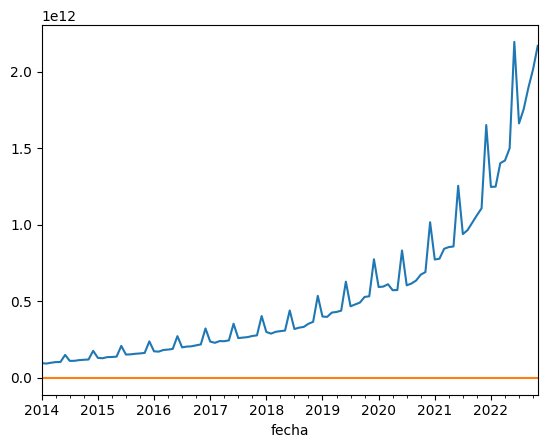

In [ ]:
sal.masa.plot()
sal.puestos.plot()

<p align="justify">
Si tenemos que interpretar el gráfico vamos a concluir que prácticamente no hay puestos de trabajo y no se mueven durante todo el periodo de tiempo.
<br><br>
Una forma de corregir esto es escalando las variables.

In [ ]:
from sklearn.preprocessing import StandardScaler

<Axes: xlabel='fecha'>

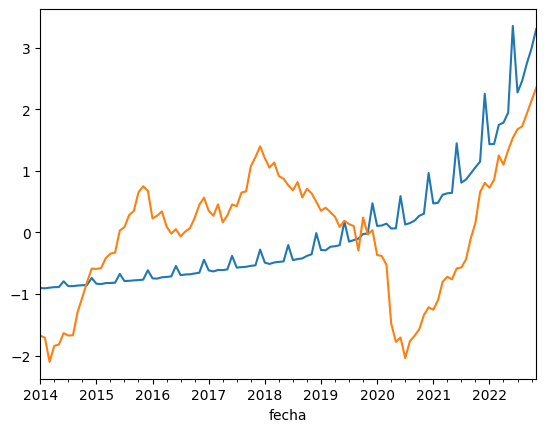

In [ ]:
sal_esc = StandardScaler().fit_transform(sal)

sal_esc = pd.DataFrame(sal_esc, index = sal.index, columns = sal.columns)
sal_esc.masa.plot()
sal_esc.puestos.plot()

<p align="justify">
Vamos a realizar el mismo gráfico con <code>plotly</code>  para tener un gráfico mucho más profesional

In [ ]:
import pandas as pd
import plotly.express as px

fig = px.line(sal_esc,
              x=sal_esc.index,
              y=['masa', 'puestos'],
              title='Masa salarial y puestos de trabajo en Argentina',
              labels={'value': 'Valor escalado', 'variable': '', 'date': 'Fecha'})

# Mostrar el gráfico
fig.show()


<p align="justify">
Ahora si podemos tener una comparación de ambas series y ver que los puestos de trabajo han tenido periodos de subida y profundas caídas, mientras que la masa salarial siempre creció pero con unos picos periódicamente. Pero, ¿Se puede confiar en esto?

## **<font color="DeepPink"> Suavizado de las series </font>**

<p align="justify">
Una forma de eliminar los picos que nos encontramos en las variales es utilizando medias movil para graficar, de esta forma vamos a tener una evolución mucho más suave ya que la media movil toma el promedio cada cierta cantidad de periodos.
<br><br>
Las medias moviles las podemos calcular con el método <code>df.rolling().mean()</code>. La funcion que cumple <code>rolling()</code> es traer la cantidad de periodos que desiemos para atras, luego podemos elegir la función que desiemos para trabajar.

In [ ]:
# vamos a a elegir 6 periodos para atras que sabemos que son los momentos en que se paga el aguinaldo.


fig = px.line(sal_esc.rolling(6).mean(), x=sal_esc.index, y=['masa', 'puestos'], title='Masa salarial y puestos de trabajo en Argentina',
              labels={'value': 'Valor escalado', 'variable': '', 'date': 'Fecha'})

# Mostrar el gráfico
fig.show()


<p align="justify">
Como vemos tenemos ahora curvas más suaves que mostrar y eliminamos los picos que se producen por el sac. En consecuencia, se pierden los 6 primeros periodos ya que no se pueden calcular.
<br><br>
Podemos ver otras funciones con rolling también tal vez queramos ver cual fue el valor máximo y de esta manera vamos a tener escalones.



In [ ]:
fig = px.line(sal_esc.rolling(6).max(), x=sal_esc.index, y=['masa', 'puestos'], title='Masa salarial y puestos de trabajo en Argentina',
              labels={'value': 'Valor escalado', 'variable': '', 'date': 'Fecha'})

# Mostrar el gráfico
fig.show()


## **<font color="DeepPink"> Descomposición de la serie   </font>**

<p align="justify">
Una serie temporal la podemos descomponer en 3 partes. Una tendencia, un ciclo y el ruido o residuo.
<br><br>
Para hacerlo podemos usar las funciones de <code>statsmodels</code>

In [ ]:
! python -m pip install statsmodels

%reload_ext autoreload
%autoreload 2
%matplotlib inline



In [ ]:
import statsmodels.api as sm

In [ ]:
descom = sm.tsa.seasonal_decompose(sal.masa)
descom.trend.dropna()

fecha
2014-07-01    1.183597e+11
2014-08-01    1.212389e+11
2014-09-01    1.242098e+11
2014-10-01    1.271244e+11
2014-11-01    1.299760e+11
                  ...     
2022-01-01    1.343903e+12
2022-02-01    1.406979e+12
2022-03-01    1.476682e+12
2022-04-01    1.553160e+12
2022-05-01    1.637147e+12
Name: trend, Length: 95, dtype: float64

In [ ]:
descom.seasonal

fecha
2014-01-01   -1.726295e+10
2014-02-01   -3.596221e+10
2014-03-01   -1.592801e+10
2014-04-01   -3.495467e+10
2014-05-01   -4.184821e+10
                  ...     
2022-07-01   -2.842045e+10
2022-08-01   -3.190476e+10
2022-09-01   -3.242345e+10
2022-10-01   -2.571771e+10
2022-11-01   -2.805430e+10
Name: seasonal, Length: 107, dtype: float64

In [ ]:
descom.resid.dropna()

fecha
2014-07-01    2.125600e+10
2014-08-01    2.261261e+10
2014-09-01    2.455727e+10
2014-10-01    1.726099e+10
2014-11-01    1.842075e+10
                  ...     
2022-01-01   -7.806839e+10
2022-02-01   -1.208687e+11
2022-03-01   -5.719679e+10
2022-04-01   -9.709559e+10
2022-05-01   -9.414681e+10
Name: resid, Length: 95, dtype: float64

Podemos graficarlo con el <code>.plot()</code> del objeto <code> tsa.seasonal_descompose </code>

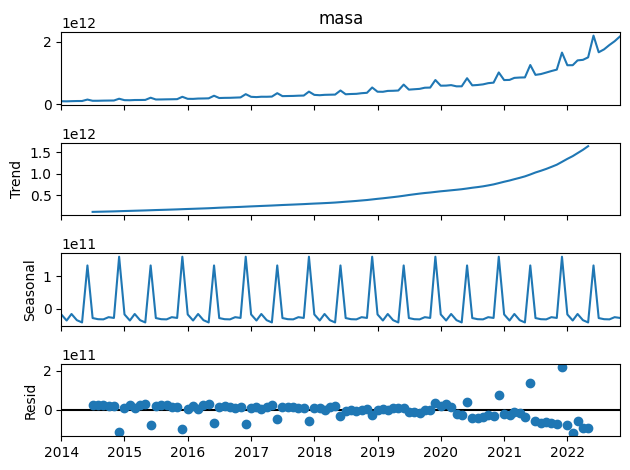

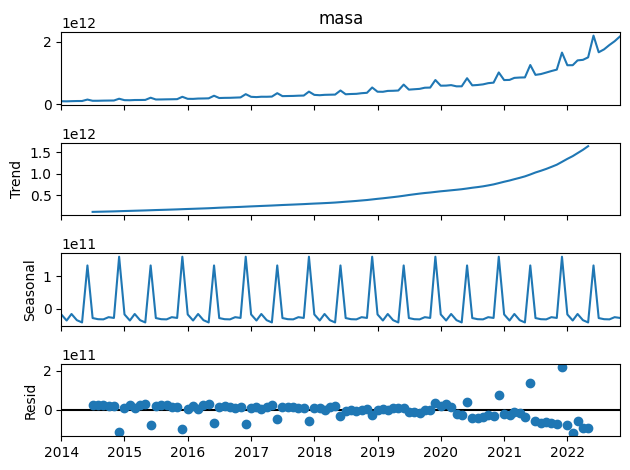

In [ ]:
descom.plot()

<p align="justify">
Ahora podemos eliminar los ciclos de la serie y de esta manera la vamos a poder observar completa sin perder periodos y analizarla de manera más suave.


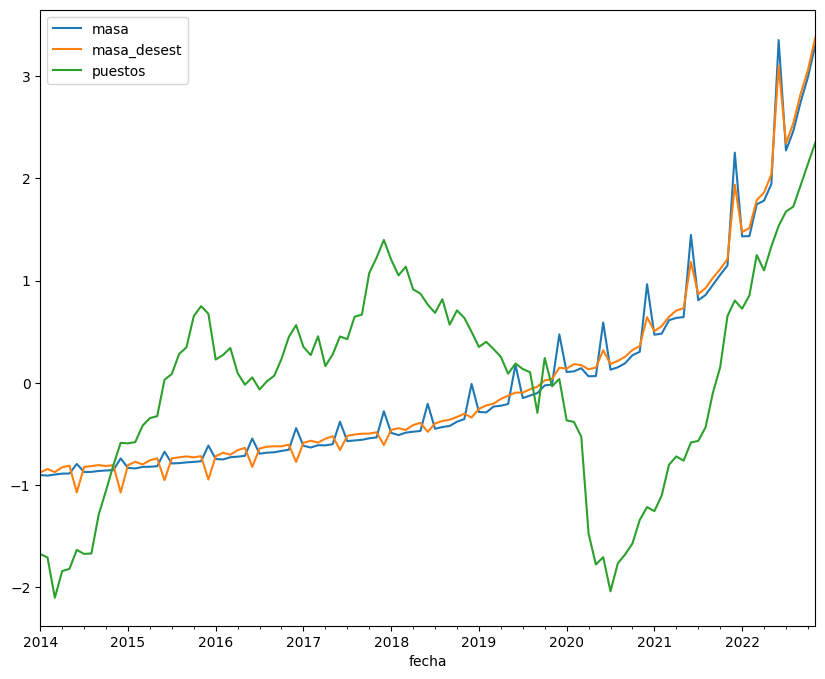

In [ ]:

sal['masa_desest'] = sal.masa-descom.seasonal
sal_esc = StandardScaler().fit_transform(sal)
sal_esc = pd.DataFrame(sal_esc, index = sal.index, columns = sal.columns)
sal_esc.masa.plot(figsize = (10,8))
sal_esc['masa_desest'].plot()
sal_esc.puestos.plot()

plt.legend()

<p align="justify">
La eliminación del ciclo parece no filtrar bien los periodos de SAC, pero como en este caso conocemos exactamente cuando se produce y porque valor, podemos hacer un filtro manual.

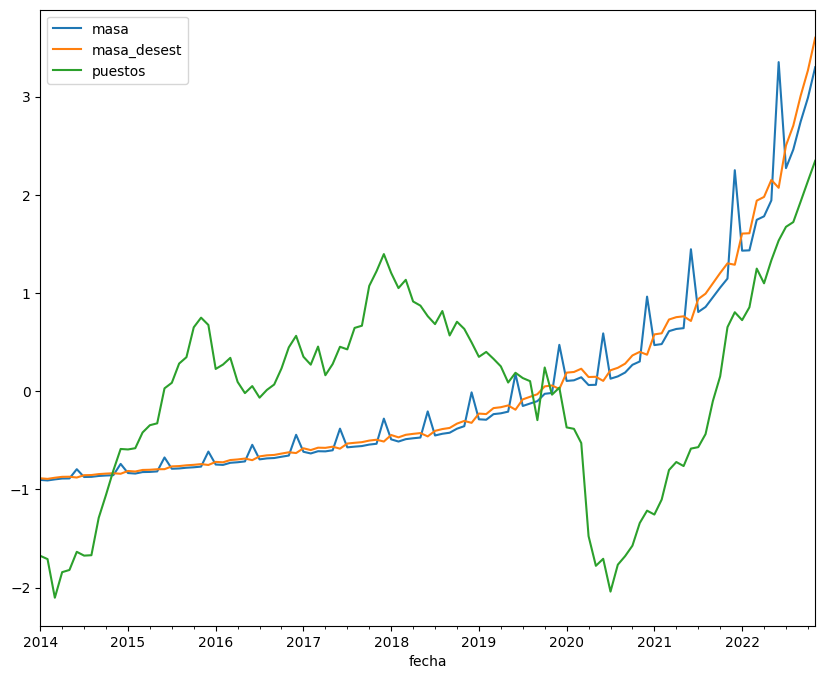

In [ ]:
filtro_sac = np.ones(len(sal))+0.5 *((sal.index.month == 6)+(sal.index.month == 12))
sal['masa_desest'] = (sal.masa/filtro_sac)

sal_esc = StandardScaler().fit_transform(sal)
sal_esc = pd.DataFrame(sal_esc, index = sal.index, columns = sal.columns)
sal_esc.masa.plot(figsize = (10,8))
sal_esc['masa_desest'].plot()
sal_esc.puestos.plot()

plt.legend()


## **<font color="DeepPink"> Uso de logaritmos</font>**

<p align="justify">
El comportamiento que tiene la variable masa salarial es explosivo, o sea cada vez crece más, por lo que pareciera que sigue un proceso exponencial. Una manera de disminuir esta variabilidad es utilizando logaritmo, muy aconsejados cuando se trabaja con series temporales. El logaritmo permite volver lineal las series exponenciales y por lo tanto, la convierte en una serie más manejable.


<Axes: xlabel='fecha'>

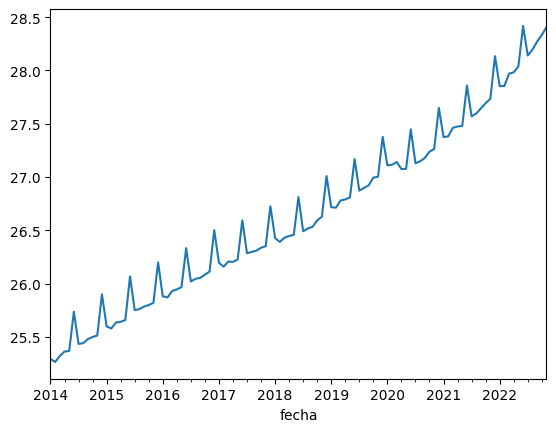

In [ ]:
# creamos otro df pero que se compone de los logaritmos
log_sal = np.log(sal)
log_sal['masa'].plot()

Apliquemosle la descomposición ahora a la serie en logarítmos y veamos como queda.

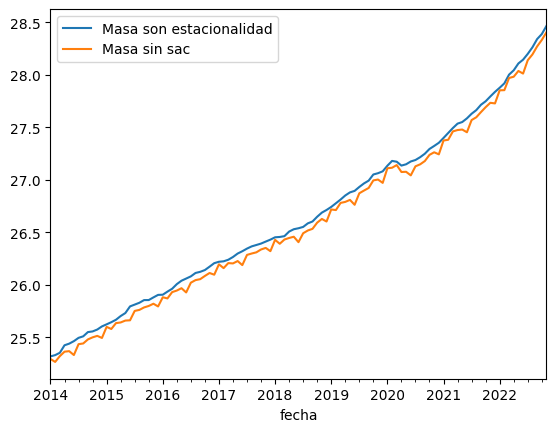

In [ ]:
descom = sm.tsa.seasonal_decompose(log_sal.masa)

(log_sal.masa-descom.seasonal).plot(label = 'Masa son estacionalidad')
log_sal.masa_desest.plot(label = 'Masa sin sac')
plt.legend()

<p align="justify">
Como se puede ver, ahora la funciónd e desestacionalizar si logra eliminar los picos que hay a causa del SAC.

## **<font color="DeepPink"> Series a valores históricos </font>**


<p align="justify">
Aun con todas nuestras modificaciones la serie nos muestra un crecimiento constante de los salarios, pero sabemos que lo que está mostrando es el crecimiento de los salarios a valores nominales. Podemos ajustar los valores con números índices externos que nos permitan definir la serie a valores históricos.
<br><br>
En este caso podemos utilizar los índices de inflación de la Argentina. En la página https://www.datos.gob.ar/ podemos encontrar un monton de datos oficiales que corresponden a la Argentina. Además ofrece una api que trabaja con python y podemos obtener los valores en forma automática y actualizada.

In [ ]:
import requests
import urllib.parse

def get_api_call(ids, **kwargs):
    API_BASE_URL = "https://apis.datos.gob.ar/series/api/"
    kwargs["ids"] = ",".join(ids)
    return "{}{}?{}".format(API_BASE_URL, "series", urllib.parse.urlencode(kwargs))


In [ ]:
# Primera opción con la api
"""
ipc  = pd.read_csv(get_api_call( ["145.3_INGNACNAL_DICI_M_15"],format = "csv"
        , start_date = 2004
        ,limit = 1000
        ))

ipc = ipc.set_index(pd.to_datetime(ipc['indice_tiempo'])).iloc[:,-1]
"""
#segunda opción
ipc = pd.read_csv("https://raw.githubusercontent.com/pabanib/dataframes/master/salarios/indice-precios-al-consumidor-nivel-general-base-diciembre-2016-trimestral.csv")[['indice_tiempo','ipc_ng_nacional']]
ipc.indice_timepo = pd.to_datetime(ipc.indice_tiempo)
ipc = ipc.set_index('indice_tiempo')

ipc

<ipython-input-119-e00b59dcaf74>:12: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,ipc_ng_nacional
indice_tiempo,
2017-01-01,103.806467
2017-04-01,110.448167
2017-07-01,115.579667
2017-10-01,121.714133
2018-01-01,130.051567
2018-04-01,140.381933
2018-07-01,156.546100
2018-10-01,179.347100
2019-01-01,197.439100


<p align="justify">
Como el ipc tiene su primer periodo en dicembre 2016 vamos a usar para actualizar el Coeficiente de estabilización de referencia (CER) para ajustar nuestra variable.

In [ ]:
## con la api
"""
valores = pd.read_csv(get_api_call(['94.2_CD_D_0_0_10','94.2_UVAD_D_0_0_10','94.2_UVID_D_0_0_10'], format = 'csv', start_date = 2000
,collapse_aggregation = 'end_of_period'
,collapse = 'month'
 ,limit = 1000))
"""
## segunda opción

valores = pd.read_csv("https://raw.githubusercontent.com/pabanib/dataframes/master/salarios/cer-uva-uvi-diarios.csv")

valores = valores.set_index(pd.to_datetime(valores['indice_tiempo']))

cer = valores.cer_diario

In [ ]:
valores

,indice_tiempo,cer_diario,uva_diario,uvi_diario
indice_tiempo,,,,
2003-01-01,2003-01-01,1.405500,NaN,NaN
2003-01-02,2003-01-02,1.405800,NaN,NaN
2003-01-03,2003-01-03,1.406000,NaN,NaN
2003-01-04,2003-01-04,1.406200,NaN,NaN
2003-01-05,2003-01-05,1.406400,NaN,NaN
...,...,...,...,...
2023-07-27,2023-07-27,114.988519,289.84,253.74
2023-07-28,2023-07-28,115.204860,290.38,254.17
2023-07-29,2023-07-29,115.421607,290.93,254.61


In [ ]:
cer.index

DatetimeIndex(['2003-01-01', '2003-01-02', '2003-01-03', '2003-01-04',
               '2003-01-05', '2003-01-06', '2003-01-07', '2003-01-08',
               '2003-01-09', '2003-01-10',
               ...
               '2023-07-22', '2023-07-23', '2023-07-24', '2023-07-25',
               '2023-07-26', '2023-07-27', '2023-07-28', '2023-07-29',
               '2023-07-30', '2023-07-31'],
              dtype='datetime64[ns]', name='indice_tiempo', length=7517, freq=None)

<Axes: >

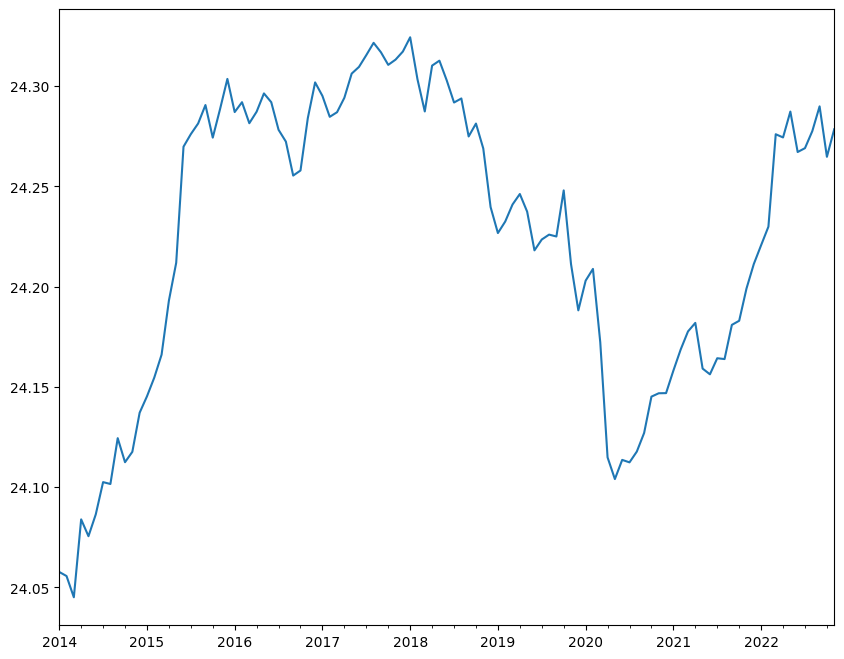

In [ ]:
# Juntamos la base de salarios con el cer
sal2 = pd.merge(sal,cer, left_index = True, right_index = True)
sal2['masa_vh'] = sal2.masa/sal2.cer_diario
sal2 = np.log(sal2)

descom = sm.tsa.seasonal_decompose(sal2.masa_vh)
sal2['masa_vh'] = sal2.masa_vh - descom.seasonal
sal2.masa_vh.plot(figsize = (10,8))



In [ ]:
sal2['sal_prom'] = sal2.masa_vh/sal2.puestos

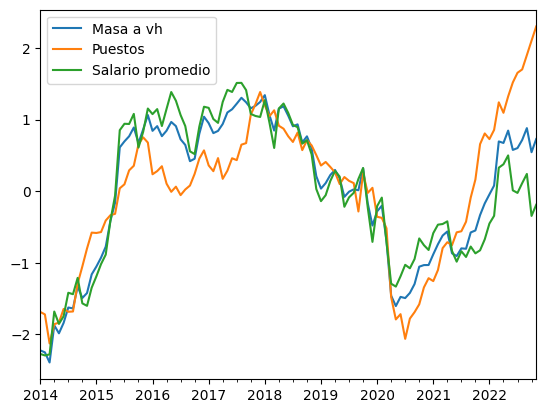

In [ ]:
sal_esc = StandardScaler().fit_transform(sal2)

sal_esc = pd.DataFrame(sal_esc, index = sal2.index, columns = sal2.columns)
sal_esc.masa_vh.plot(label = 'Masa a vh')
sal_esc.puestos.plot(label = 'Puestos')
sal_esc.sal_prom.plot(label = 'Salario promedio')
plt.legend()

In [ ]:
px.line(sal_esc, x = sal_esc.index, y = ['masa_vh', 'puestos', 'sal_prom'], title = 'Masa salarial, puestos y promedio en Argentina')

## **<font color="DeepPink"> Diferencias y porcentajes de cambio </font>**

<p align="justify">
Una función util para las series temporales son las primeras diferencias o diferencias con más otros periodos ambas se pueden usar con el método <code> df.diff() </code>. Relacionada a esta y depende con que tipo de datos estamos trabajando podemos usar <code> df.pct_change()</code> esta función nos permite calcular las diferencias como porcentaje de cambio.

<Axes: xlabel='fecha'>

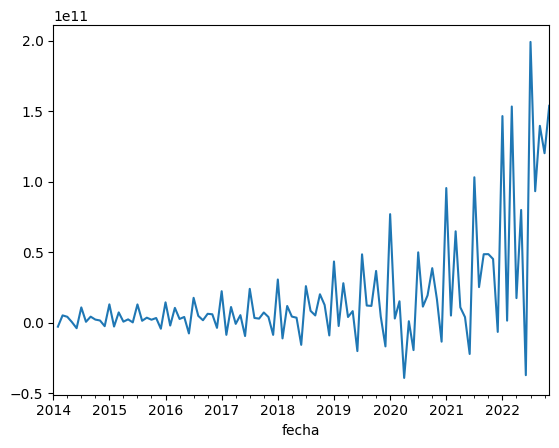

In [ ]:
sal.diff(1).masa_desest.plot()

<Axes: xlabel='fecha'>

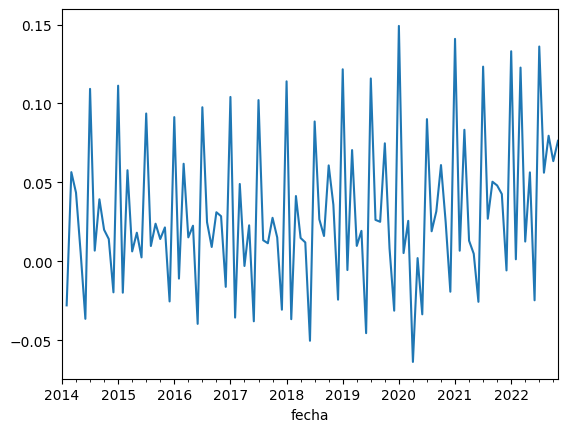

In [ ]:
sal.pct_change(1).masa_desest.plot()

<p align="justify">
Las diferencias siguen estando en valores, por lo tanto ante una serie explosiva estas diferencias lo van a seguir siendo. El porcentaje de cambio se muestra más estable ya que es una vriación relativa.
<br><br>
Si trabajamos con la variable en logaritmos las diferencias referencian a porcentaje de cambio.

<Axes: >

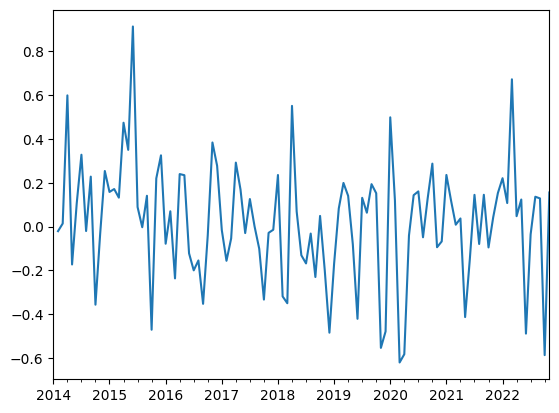

In [ ]:
sal_esc.diff().sal_prom.plot()

Tambien la podemos estabilizar mostrando cual es la diferencia con el año anterior.


<Axes: >

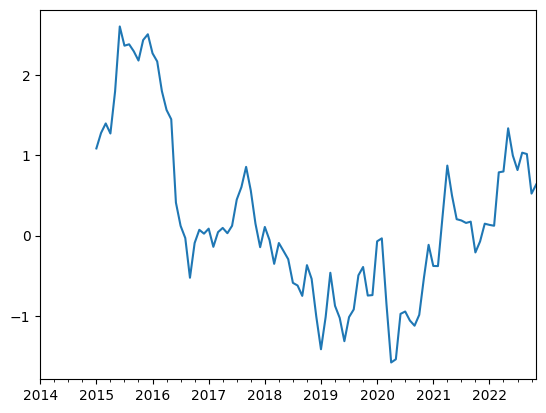

In [ ]:
sal_esc.diff(12).sal_prom.plot()

<p align="justify">
De esta forma podemos ver cuales fueron los cambios más fuertes tanto a la baja como a la suba

In [ ]:
df_min = sal_esc.loc[sal_esc.diff(1).sal_prom.dropna().sort_values()[:5].index]
df_max = sal_esc.loc[sal_esc.diff(1).sal_prom.dropna().sort_values()[-5:].index]

In [ ]:
fig = px.line(sal_esc, x=sal_esc.index, y=['masa_vh', 'puestos', 'sal_prom'], title='Masa salarial, puestos y promedio en Argentina')

#fig.add_trace(px.scatter(df_min, x=df_min.index, y='sal_prom', marker_size = 10, marker_color = 'red').data[0])
scatter_trace = px.scatter(df_min, x=df_min.index, y='sal_prom')
scatter_trace.update_traces(marker=dict(size=10, color='red'))

scatter_trace2 = px.scatter(df_max, x=df_max.index, y='sal_prom')
scatter_trace2.update_traces(marker=dict(size=10, color='green'))

fig.add_trace(scatter_trace.data[0])
fig.add_trace(scatter_trace2.data[0])

<br>
<br>
<p align="center"><b>
💗
<font color="DeepPink">
Hemos llegado al final de nuestro colab...
</font>
</p>
<br>
<p align="center">
<img src="https://github.com/cristiandarioortegayubro/BDS/blob/main/images/Logo%20BDS%20Horizontal%208.png?raw=true">
</p>

---
